In [ ]:
# Intro ML Group Project

In [49]:
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

In [50]:
from pathlib import Path
import pandas as pd
from sklearn.linear_model import LinearRegression

def load_custom_data(csv_file_path):
    return pd.read_csv(csv_file_path)

taxi_train = load_custom_data("train.csv")
taxi_test  = load_custom_data("test.csv")

In [51]:
taxi_train.head()

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
0,748.0,2.75,1.0,75.00,24,6.300,105.300,0
1,1187.0,3.43,1.0,105.00,24,13.200,142.200,0
2,730.0,3.12,1.0,71.25,0,26.625,97.875,1
3,671.0,5.63,3.0,90.00,0,9.750,99.750,0
4,329.0,2.09,1.0,45.00,12,13.200,70.200,0


In [52]:
taxi_test.head()

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
0,1076.0,4.18,1.0,0,0,13.500,0,0
1,429.0,1.48,4.0,0,0,13.500,0,0
2,856.0,4.15,1.0,0,24,6.000,0,0
3,622.0,3.22,1.0,0,15,5.625,0,0
4,507.0,3.98,1.0,0,0,2.250,0,0


In [53]:
taxi_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209673 entries, 0 to 209672
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   trip_duration       209673 non-null  float64
 1   distance_traveled   209673 non-null  float64
 2   num_of_passengers   209673 non-null  float64
 3   fare                209673 non-null  float64
 4   tip                 209673 non-null  int64  
 5   miscellaneous_fees  209673 non-null  float64
 6   total_fare          209673 non-null  float64
 7   surge_applied       209673 non-null  int64  
dtypes: float64(6), int64(2)
memory usage: 12.8 MB


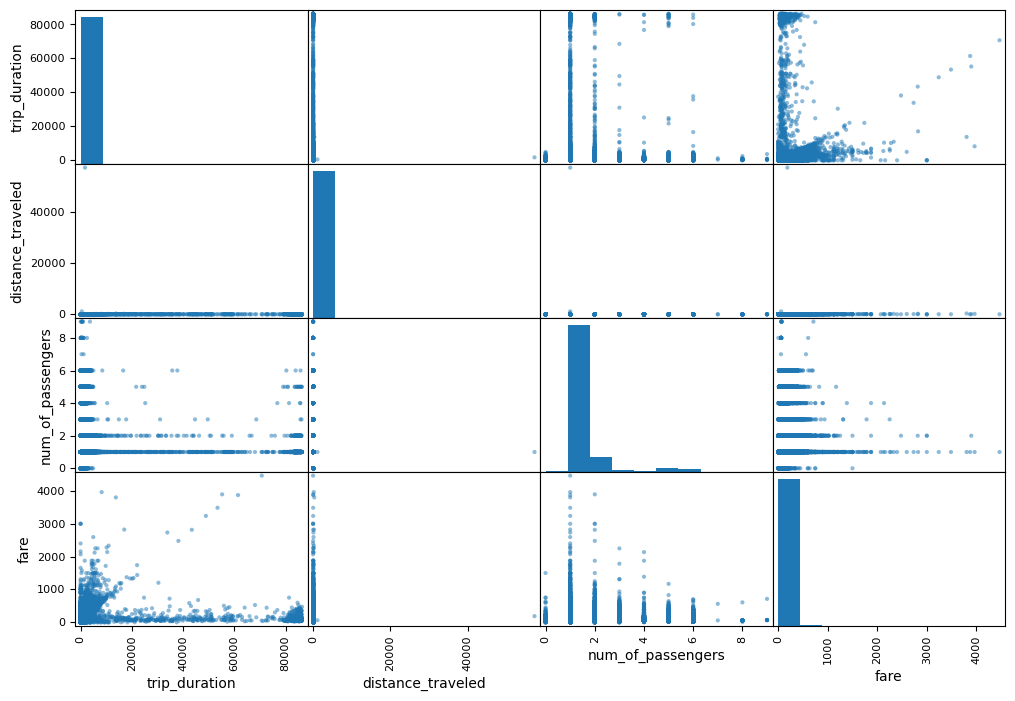

In [54]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

attributes = ["trip_duration", "distance_traveled", "num_of_passengers",
              "fare"]
scatter_matrix(taxi_train[attributes], figsize=(12, 8))
plt.show()

In [60]:
lr = LinearRegression()

X_train= taxi_train[["trip_duration"]].values
y_train= taxi_train[["fare"]].values
X_test= taxi_test[["trip_duration"]].values
y_test= taxi_test[["fare"]].values

lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

from sklearn.metrics import mean_squared_error

print("Test RMSE: %.3f" % mean_squared_error( y_test, y_pred) ** 0.5)

Test RMSE: 100.329


In [63]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth=5, random_state=0, n_estimators=200)
rf.fit(X_train, y_train.ravel())
y_pred = rf.predict(X_test)

print("Test RMSE: %.3f" % mean_squared_error( y_test, y_pred) ** 0.5)

Test RMSE: 117.788
